In [165]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sklearn import set_config
set_config(transform_output="pandas")

#Gerekli kütüphaneler 
import pandas as pd
import numpy as np
import yfinance 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
import requests
from bs4 import BeautifulSoup

def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
        df.drop(columns='No.', inplace=True)
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

In [74]:
sectors=fetch_sectors_names()
indusrty=fetch_industry_names()

In [75]:
fetch_data(sectors='energy').to_csv('data/energy.csv')
fetch_data(sectors='financials').to_csv('data/financials.csv')
fetch_data(sectors='healthcare').to_csv('data/healthcare.csv')
fetch_data(sectors='technology').to_csv('data/technology.csv')
fetch_data(sectors='utilities').to_csv('data/utilities.csv')
fetch_data(sectors='real-estate').to_csv('data/real-estate.csv')
fetch_data(sectors='materials').to_csv('data/materials.csv')
fetch_data(sectors='technology').to_csv('data/technology.csv')
fetch_data(sectors='industrials').to_csv('data/industrials.csv')
fetch_data(sectors='consumer-staples').to_csv('data/consumer-staples.csv')
fetch_data(sectors='consumer-discretionary').to_csv('data/consumer-discretionary.csv')
fetch_data(sectors='communication-services').to_csv('data/communication-services.csv')

In [100]:
finance = pd.read_csv('data/financials.csv')
finance_list=finance['Symbol'].to_list()

health = pd.read_csv('data/healthcare.csv')
health_list=health['Symbol'].to_list()

technology = pd.read_csv('data/technology.csv')
technology_list=technology['Symbol'].to_list()

In [104]:
technology_list

['MSFT',
 'AAPL',
 'NVDA',
 'TSM',
 'AVGO',
 'ASML',
 'ORCL',
 'AMD',
 'CRM',
 'ACN',
 'ADBE',
 'SAP',
 'CSCO',
 'QCOM',
 'INTC',
 'INTU',
 'IBM',
 'AMAT',
 'UBER',
 'NOW',
 'TXN',
 'LRCX',
 'SONY',
 'MU',
 'SHOP',
 'ADI',
 'KLAC',
 'PANW',
 'ANET',
 'FI',
 'SNPS',
 'CDNS',
 'INFY',
 'ARM',
 'CRWD',
 'DELL',
 'WDAY',
 'APH',
 'NXPI',
 'SMCI',
 'COIN',
 'MRVL',
 'MSI',
 'ADSK',
 'PLTR',
 'SNOW',
 'TEAM',
 'FTNT',
 'SQ',
 'MCHP',
 'TEL',
 'STM',
 'DDOG',
 'FIS',
 'TTD',
 'CTSH',
 'IT',
 'MPWR',
 'CDW',
 'WIT',
 'ON',
 'NET',
 'HUBS',
 'FICO',
 'MSTR',
 'FTV',
 'HPQ',
 'ANSS',
 'ZS',
 'GFS',
 'GRMN',
 'GLW',
 'GIB',
 'KEYS',
 'MDB',
 'TEF',
 'ASX',
 'BR',
 'APP',
 'HPE',
 'PTC',
 'FLT',
 'NTAP',
 'UMC',
 'ENTG',
 'ZM',
 'TDY',
 'WDC',
 'NOK',
 'IOT',
 'CHKP',
 'VRSN',
 'STX',
 'ERIC',
 'TYL',
 'OKTA',
 'EPAM',
 'LDOS',
 'GDDY',
 'SWKS',
 'AKAM',
 'PSTG',
 'HOOD',
 'TER',
 'NTNX',
 'JBL',
 'FSLR',
 'SSNC',
 'NICE',
 'TRMB',
 'MANH',
 'ZBRA',
 'ENPH',
 'BSY',
 'LOGI',
 'GEN',
 'DT',
 'PATH'

#### Hocam isterseniz yfinance'dan verileri indirmekle uğraşmayıp (aşağıdaki hücreleri çalıştırmadan direkt tsfresh uyguladığım kısma geçebilirsiniz.

In [80]:
#Verileri 2005'ten itibaren çektiğimde ilerki işlemler için bilgisayarımda sorun oldu. Bu yüzden 2021 den itibaren olan verileri kullandım.
valid_symbols = [symbol for symbol in finance_list if isinstance(symbol, str)]
data_finance= yfinance.download(valid_symbols, start='2021-01-01')

[*********************100%%**********************]  996 of 996 completed

8 Failed downloads:
['AGM.A', 'CRD.B', 'BNRE.A', 'DYCQ', 'CRD.A', 'BRK.B', 'DISA', 'LEGT']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [81]:
valid_symbols = [symbol for symbol in health_list if isinstance(symbol, str)]
data_health=yfinance.download(valid_symbols, start='2021-01-01') 

[*********************100%%**********************]  1214 of 1214 completed

1 Failed download:
['BIO.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-01-01 -> 2024-03-19)')


In [82]:
valid_symbols = [symbol for symbol in technology_list if isinstance(symbol, str)]
data_technology=yfinance.download(valid_symbols, start='2021-01-01') 

[*********************100%%**********************]  785 of 785 completed


In [83]:
#Haftalık getiriler üzerinden devame edince daha iyi accuracy aldığımı farkettim . 
data_close_finance=data_finance['Adj Close'].resample('W-MON').last().pct_change()+1
data_close_health=data_health['Adj Close'].resample('W-MON').last().pct_change()+1
data_close_technology=data_technology['Adj Close'].resample('W-MON').last().pct_change()+1

In [84]:
#Bu fonksiyon hisselerin haftalık getirileri üzerinden momentum (birikimli getirilerini)hesaplar. 
#Momentumun finanasal olarak karşılığı, bir hissenin herhangi bir değerinin belirli bir zaman içerisindeki değişim hızıdır.

import numpy as np
def get_rolling_ret(data, n): 
    return data.rolling(n).apply(np.prod)

In [85]:
finance_df = get_rolling_ret(data_close_finance,3)
health_df = get_rolling_ret(data_close_health,3)
technology_df = get_rolling_ret(data_close_technology,3)

In [86]:
df=pd.concat([finance_df,health_df,technology_df],axis=1)

In [87]:
df

Ticker,AACI,AACT,AAMC,AAME,AB,ABCB,ABL,ABTS,AC,ACAB,...,YOU,ZBRA,ZENV,ZEPP,ZETA,ZFOX,ZI,ZM,ZS,ZUO
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25,NaN,NaN,NaN,1.196261,1.100752,1.145932,1.020568,1.335878,1.001144,NaN,...,NaN,1.064793,NaN,1.141961,NaN,NaN,1.018868,1.088477,1.059004,1.060517
2021-02-01,NaN,NaN,NaN,0.987234,1.029940,0.946547,1.027586,1.156863,0.965680,NaN,...,NaN,0.960221,NaN,1.016212,NaN,0.997059,1.141104,1.130941,1.029039,1.000703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-19,1.008264,1.001905,0.881657,0.920152,0.978692,0.901178,1.001629,0.927885,0.961896,0.976895,...,0.942619,1.076310,1.690265,1.000000,1.034034,1.120000,1.037982,0.901204,1.031422,0.881981
2024-02-26,1.007333,1.002854,0.828629,0.989091,0.999702,0.942567,0.973387,1.053763,1.000880,0.941850,...,0.934299,1.148676,1.591304,1.008475,1.071577,1.224044,1.102081,0.991050,1.041586,0.975610
2024-03-04,1.007339,1.003333,0.930233,1.086420,0.963993,0.931995,0.952304,0.898990,1.006615,1.011353,...,0.949323,1.124325,1.004785,0.855072,1.013766,1.000000,1.038077,1.081110,0.843851,0.949772


In [88]:
#Tüm row'ları boş olan column'lar. 
nan_columns = df.columns[df.isna().all()]
nan_columns

Index(['AGM.A', 'BNAI', 'BNRE.A', 'BRK.B', 'CRD.A', 'CRD.B', 'DISA', 'DYCQ',
       'JVSA', 'LEGT', 'BIO.B', 'RYDE', 'XTIA'],
      dtype='object', name='Ticker')

In [89]:
#Yukarda verileri indirirken bazılarının datasının oldmadığının uyarısı verilmişti. Tüm satırları boş olan şirketleri kaldırdım.
df.drop(list(nan_columns),axis=1,inplace=True)
df

Ticker,AACI,AACT,AAMC,AAME,AB,ABCB,ABL,ABTS,AC,ACAB,...,YOU,ZBRA,ZENV,ZEPP,ZETA,ZFOX,ZI,ZM,ZS,ZUO
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25,NaN,NaN,NaN,1.196261,1.100752,1.145932,1.020568,1.335878,1.001144,NaN,...,NaN,1.064793,NaN,1.141961,NaN,NaN,1.018868,1.088477,1.059004,1.060517
2021-02-01,NaN,NaN,NaN,0.987234,1.029940,0.946547,1.027586,1.156863,0.965680,NaN,...,NaN,0.960221,NaN,1.016212,NaN,0.997059,1.141104,1.130941,1.029039,1.000703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-19,1.008264,1.001905,0.881657,0.920152,0.978692,0.901178,1.001629,0.927885,0.961896,0.976895,...,0.942619,1.076310,1.690265,1.000000,1.034034,1.120000,1.037982,0.901204,1.031422,0.881981
2024-02-26,1.007333,1.002854,0.828629,0.989091,0.999702,0.942567,0.973387,1.053763,1.000880,0.941850,...,0.934299,1.148676,1.591304,1.008475,1.071577,1.224044,1.102081,0.991050,1.041586,0.975610
2024-03-04,1.007339,1.003333,0.930233,1.086420,0.963993,0.931995,0.952304,0.898990,1.006615,1.011353,...,0.949323,1.124325,1.004785,0.855072,1.013766,1.000000,1.038077,1.081110,0.843851,0.949772


In [90]:
df=df.reset_index()
df

Ticker,Date,AACI,AACT,AAMC,AAME,AB,ABCB,ABL,ABTS,AC,...,YOU,ZBRA,ZENV,ZEPP,ZETA,ZFOX,ZI,ZM,ZS,ZUO
0,2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-25,NaN,NaN,NaN,1.196261,1.100752,1.145932,1.020568,1.335878,1.001144,...,NaN,1.064793,NaN,1.141961,NaN,NaN,1.018868,1.088477,1.059004,1.060517
4,2021-02-01,NaN,NaN,NaN,0.987234,1.029940,0.946547,1.027586,1.156863,0.965680,...,NaN,0.960221,NaN,1.016212,NaN,0.997059,1.141104,1.130941,1.029039,1.000703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2024-02-19,1.008264,1.001905,0.881657,0.920152,0.978692,0.901178,1.001629,0.927885,0.961896,...,0.942619,1.076310,1.690265,1.000000,1.034034,1.120000,1.037982,0.901204,1.031422,0.881981
164,2024-02-26,1.007333,1.002854,0.828629,0.989091,0.999702,0.942567,0.973387,1.053763,1.000880,...,0.934299,1.148676,1.591304,1.008475,1.071577,1.224044,1.102081,0.991050,1.041586,0.975610
165,2024-03-04,1.007339,1.003333,0.930233,1.086420,0.963993,0.931995,0.952304,0.898990,1.006615,...,0.949323,1.124325,1.004785,0.855072,1.013766,1.000000,1.038077,1.081110,0.843851,0.949772
166,2024-03-11,1.000000,1.002376,0.825503,1.140496,1.030972,0.999578,0.917480,0.854922,1.019323,...,1.070239,1.017317,1.048168,0.869231,1.002904,0.991071,0.954831,1.121700,0.794224,1.112306


In [91]:
#Veriyi tsfresh için uygun hale getirdim.  
df = df.melt(id_vars=['Date'], var_name='id', value_name='Adj Close')

In [92]:
#Tsfresh'i kullanabilmek için veride Nan değerlerin olmaması gerekiyor.Çok fazla Nan değer olmadığı için dropna() fonksiyonu kullandım.
print(f'Bos değerleri kaldırmadan önce verinin boyutu: {df.shape}')
print(f'Boş değerlerin tüm veriye oranı {df.isnull().sum().sum()/df.size}')
df.dropna(inplace=True)
print(f'Bos değerleri kaldırdıktan sonra verinin boyutu: {df.shape}')

Bos değerleri kaldırmadan önce verinin boyutu: (500976, 3)
Boş değerlerin tüm veriye oranı 0.03533169918984808
Bos değerleri kaldırdıktan sonra verinin boyutu: (447875, 3)


### Burdan tsfresh i çalıştırmadan veriye ulaşabilirsiniz.

In [186]:
df_ts=pd.read_csv("data/tsfresh_data.csv",index_col=0)

In [105]:
#ComprehensiveFCAParameters'ı kullanırken bilgisayarımla ilgili sorun yaşadım. Bu yüzden EfficientFCAParameters'ı kullandım.
#Hocam isterseniz tsfreh'i çalıştırmadan veriye ulaşabilirsiniz.
import tsfresh
df_ts=tsfresh.extract_features(df, column_id='id', column_sort='Date', 
                                       default_fc_parameters=tsfresh.feature_extraction.EfficientFCParameters())

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [01:22<00:00,  2.73s/it]


In [111]:
df_ts
print(f'Veri setinin boyutu {df_ts.shape}')

,Adj Close__variance_larger_than_standard_deviation,Adj Close__has_duplicate_max,Adj Close__has_duplicate_min,Adj Close__has_duplicate,Adj Close__sum_values,Adj Close__abs_energy,Adj Close__mean_abs_change,Adj Close__mean_change,Adj Close__mean_second_derivative_central,Adj Close__median,...,Adj Close__fourier_entropy__bins_5,Adj Close__fourier_entropy__bins_10,Adj Close__fourier_entropy__bins_100,Adj Close__permutation_entropy__dimension_3__tau_1,Adj Close__permutation_entropy__dimension_4__tau_1,Adj Close__permutation_entropy__dimension_5__tau_1,Adj Close__permutation_entropy__dimension_6__tau_1,Adj Close__permutation_entropy__dimension_7__tau_1,Adj Close__query_similarity_count__query_None__threshold_0.0,Adj Close__mean_n_absolute_max__number_of_maxima_7
A,0.0,0.0,0.0,0.0,165.827771,167.347953,0.040678,0.000325,0.000409,1.000169,...,0.915812,1.421793,2.951843,1.707969,2.857853,3.873719,4.562229,4.896665,NaN,1.150633
AACI,0.0,0.0,0.0,1.0,120.358622,120.725495,0.005266,0.000101,0.000055,1.002220,...,1.152420,1.802847,3.318022,1.751541,3.022677,4.012560,4.595725,4.711877,NaN,1.020432
AACT,0.0,0.0,0.0,0.0,37.121139,37.242781,0.001485,-0.000031,0.000035,1.002950,...,1.340198,1.684760,2.479122,1.741924,2.950138,3.328472,3.465736,3.433987,NaN,1.005542
AADI,0.0,0.0,0.0,0.0,161.674613,163.423653,0.105820,-0.000963,-0.000213,0.966842,...,0.779705,1.330091,3.113953,1.755268,2.969632,4.025184,4.740365,5.007872,NaN,1.469085
AAMC,0.0,0.0,0.0,0.0,105.255930,119.424891,0.173800,0.002484,0.000736,0.965119,...,0.283952,0.500987,2.110537,1.769534,2.925017,3.893598,4.387028,4.535467,NaN,1.775860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZURA,0.0,0.0,0.0,0.0,46.054838,45.596478,0.116431,0.005816,0.000332,0.965443,...,0.661477,1.070484,2.522418,1.568484,2.516585,3.051601,3.500629,3.696721,NaN,1.286107
ZVRA,0.0,0.0,0.0,0.0,165.898733,170.526220,0.098262,0.000896,-0.000182,0.991837,...,0.776202,1.305772,3.014742,1.735841,2.972304,4.120703,4.704731,4.952269,NaN,1.442949
ZVSA,0.0,0.0,0.0,1.0,97.470219,98.468800,0.168128,-0.002037,-0.003241,0.992126,...,0.885991,1.374148,3.068015,1.782889,3.010938,4.031430,4.529835,4.587669,NaN,1.669585
ZYME,0.0,0.0,0.0,0.0,162.381641,163.545460,0.100637,-0.000744,0.000922,0.966851,...,0.396939,0.819323,2.637207,1.742067,2.962369,4.026336,4.749030,4.975134,NaN,1.318847


Veri setinin boyutu (2982, 777)


df_ts.to_csv("tsfresh_data.csv",index=True)

In [187]:
#Tüm değerleri boş olan sütunları veri setinden attım. 
nan_columns = df_ts.columns[df_ts.isnull().all()]
print(f'Veri setindeki tümü boş olan columnlar {len(nan_columns)}')
df_ts.drop(list(nan_columns),inplace=True,axis=1)
print(f'Veri setinin son boyutu {df_ts.shape}')

Veri setindeki tümü boş olan columnlar 69
Veri setinin son boyutu (2982, 708)


In [188]:
# Hedef veri setini oluşturdum.
companies_list=list(df_ts.index)
y=pd.DataFrame(companies_list,columns=['Target'])
y['Target'] = y['Target'].apply(lambda x: 'f' if x in finance_list else ('h' if x in health_list else 't'))
y

,Target
0,h
1,f
2,f
3,h
4,f
...,...
2977,h
2978,h
2979,h
2980,h


In [189]:
y.value_counts()

Target
h         1213
f          986
t          783
Name: count, dtype: int64

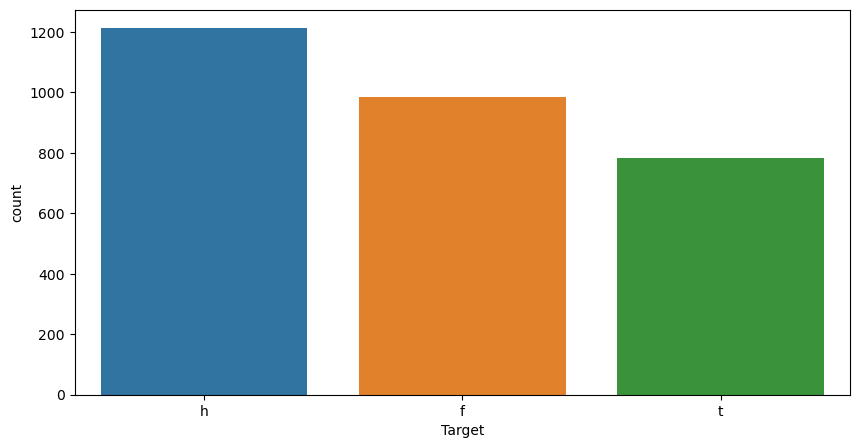

In [190]:
plt.figure(figsize=(10,5))
sns.countplot(y,x = "Target" );

In [191]:
#Sklearn'deki çoğu sınıflandırma modeli için aslında encoder'a gerek yok. Yine'de ilerde sorun yaşamamak için dönüştürdüm.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y['Target'] = label_encoder.fit_transform(y['Target'])
y.value_counts()

Target
1         1213
0          986
2          783
Name: count, dtype: int64

In [192]:
X=df_ts.reset_index(drop=True)

In [193]:
data=pd.concat([X,y],axis=1)

In [194]:
data

,Adj Close__variance_larger_than_standard_deviation,Adj Close__has_duplicate_max,Adj Close__has_duplicate_min,Adj Close__has_duplicate,Adj Close__sum_values,Adj Close__abs_energy,Adj Close__mean_abs_change,Adj Close__mean_change,Adj Close__mean_second_derivative_central,Adj Close__median,...,Adj Close__fourier_entropy__bins_5,Adj Close__fourier_entropy__bins_10,Adj Close__fourier_entropy__bins_100,Adj Close__permutation_entropy__dimension_3__tau_1,Adj Close__permutation_entropy__dimension_4__tau_1,Adj Close__permutation_entropy__dimension_5__tau_1,Adj Close__permutation_entropy__dimension_6__tau_1,Adj Close__permutation_entropy__dimension_7__tau_1,Adj Close__mean_n_absolute_max__number_of_maxima_7,Target
0,0.0,0.0,0.0,0.0,165.827771,167.347953,0.040678,0.000325,0.000409,1.000169,...,0.915812,1.421793,2.951843,1.707969,2.857853,3.873719,4.562229,4.896665,1.150633,1
1,0.0,0.0,0.0,1.0,120.358622,120.725495,0.005266,0.000101,0.000055,1.002220,...,1.152420,1.802847,3.318022,1.751541,3.022677,4.012560,4.595725,4.711877,1.020432,0
2,0.0,0.0,0.0,0.0,37.121139,37.242781,0.001485,-0.000031,0.000035,1.002950,...,1.340198,1.684760,2.479122,1.741924,2.950138,3.328472,3.465736,3.433987,1.005542,0
3,0.0,0.0,0.0,0.0,161.674613,163.423653,0.105820,-0.000963,-0.000213,0.966842,...,0.779705,1.330091,3.113953,1.755268,2.969632,4.025184,4.740365,5.007872,1.469085,1
4,0.0,0.0,0.0,0.0,105.255930,119.424891,0.173800,0.002484,0.000736,0.965119,...,0.283952,0.500987,2.110537,1.769534,2.925017,3.893598,4.387028,4.535467,1.775860,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,0.0,0.0,0.0,0.0,46.054838,45.596478,0.116431,0.005816,0.000332,0.965443,...,0.661477,1.070484,2.522418,1.568484,2.516585,3.051601,3.500629,3.696721,1.286107,1
2978,0.0,0.0,0.0,0.0,165.898733,170.526220,0.098262,0.000896,-0.000182,0.991837,...,0.776202,1.305772,3.014742,1.735841,2.972304,4.120703,4.704731,4.952269,1.442949,1
2979,0.0,0.0,0.0,1.0,97.470219,98.468800,0.168128,-0.002037,-0.003241,0.992126,...,0.885991,1.374148,3.068015,1.782889,3.010938,4.031430,4.529835,4.587669,1.669585,1
2980,0.0,0.0,0.0,0.0,162.381641,163.545460,0.100637,-0.000744,0.000922,0.966851,...,0.396939,0.819323,2.637207,1.742067,2.962369,4.026336,4.749030,4.975134,1.318847,1


In [195]:
#Az miktarda veri nan değer içerdiği için 0 ile doldurmak yerine nan değerleri attım. Daha iyi bir accuracy elde ettim.
data.isna().sum().sum()/data.size
data.dropna(inplace=True)

0.04389288244748226

In [196]:
X=data.drop('Target',axis=1)
Y=data[['Target']]

In [197]:
#Overfit olmaması için veri üzerinde ön işleme yaparken model test ve train diye ayırdım.
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)

In [198]:
#Veriye uygulayacağım her işlem sonrası accuracy'i test etmek için pipeline oluşturdum.
rf_pipeline = Pipeline([
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [199]:
#Verinin hiç işlem yapılmadığı halinde aldığım sonuç. 
rf_pipeline.fit(X_train,y_train.squeeze())
y_pred=rf_pipeline.predict(X_test)
accuracy_score(y_test,y_pred)

Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

0.7540229885057471

In [200]:
#Hangi scaler ile daha iyi accuracy alcağımı bulmak için yazdığım kod.
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'RobustScaler': RobustScaler()
}

best_accuracy = -1

for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = rf_pipeline
    model.fit(X_train_scaled, y_train.squeeze())
    
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test.squeeze(), y_pred)
    print(f"{scaler_name} accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_scaler = scaler_name

print(f"\nEn yüksek doğruluk değeri: {best_accuracy:.4f}, Buna karşılık gelen scaler: {best_scaler}")

Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

StandardScaler accuracy: 0.7517


Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

MinMaxScaler accuracy: 0.7494


Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

MaxAbsScaler accuracy: 0.7494


Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

RobustScaler accuracy: 0.7517

En yüksek doğruluk değeri: 0.7517, Buna karşılık gelen scaler: StandardScaler


In [201]:
from sklearn.preprocessing import RobustScaler
scaler_std = RobustScaler()
scaler_std.fit(X_train)
X_train_sr = scaler_std.transform(X_train)
X_test_sr = scaler_std.transform(X_test)

RobustScaler()

In [202]:
rf_pipeline.fit(X_train_sr,y_train.squeeze())
y_pred=rf_pipeline.predict(X_test_sr)
accuracy_score(y_test,y_pred)

Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

0.7517241379310344

In [203]:
X_train

,Adj Close__variance_larger_than_standard_deviation,Adj Close__has_duplicate_max,Adj Close__has_duplicate_min,Adj Close__has_duplicate,Adj Close__sum_values,Adj Close__abs_energy,Adj Close__mean_abs_change,Adj Close__mean_change,Adj Close__mean_second_derivative_central,Adj Close__median,...,Adj Close__fourier_entropy__bins_3,Adj Close__fourier_entropy__bins_5,Adj Close__fourier_entropy__bins_10,Adj Close__fourier_entropy__bins_100,Adj Close__permutation_entropy__dimension_3__tau_1,Adj Close__permutation_entropy__dimension_4__tau_1,Adj Close__permutation_entropy__dimension_5__tau_1,Adj Close__permutation_entropy__dimension_6__tau_1,Adj Close__permutation_entropy__dimension_7__tau_1,Adj Close__mean_n_absolute_max__number_of_maxima_7
11,0.0,0.0,0.0,1.0,160.875002,160.952646,0.111889,-0.001955,-0.000637,0.958556,...,0.448970,0.741452,1.235089,2.860752,1.696065,2.894055,3.875086,4.565067,4.955559,1.357105
216,0.0,0.0,0.0,0.0,167.649200,185.340123,0.168249,0.001118,-0.000672,0.941097,...,0.309627,0.627399,0.920258,2.420823,1.735728,2.957034,4.009073,4.729145,4.978425,1.944927
922,0.0,0.0,0.0,0.0,169.533773,179.963212,0.089032,-0.001962,0.000079,0.994675,...,0.538390,0.834842,1.288249,2.959246,1.694930,2.895672,3.955660,4.657537,4.964278,1.659424
357,0.0,0.0,0.0,1.0,165.611051,166.620526,0.031094,-0.000269,-0.000366,1.006849,...,0.226564,0.464489,0.894907,2.441654,1.726402,2.943272,3.997976,4.740365,5.016591,1.104242
1970,0.0,0.0,0.0,0.0,159.837501,160.820496,0.109673,-0.002977,-0.000864,0.969752,...,0.305534,0.369838,0.678397,2.338108,1.696103,2.853866,3.882428,4.655413,4.955559,1.393706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,0.0,0.0,0.0,0.0,165.397099,166.883551,0.048665,-0.000489,0.000105,0.995448,...,0.522955,0.815229,1.308961,2.932223,1.691396,2.855323,3.859847,4.610945,4.969706,1.238038
2055,0.0,0.0,0.0,0.0,166.773166,169.561027,0.048671,-0.001619,0.000335,1.000000,...,0.454006,0.774826,1.240451,2.767221,1.740059,2.987033,4.062347,4.781563,4.987144,1.226471
2398,0.0,0.0,0.0,0.0,166.948775,170.417537,0.054020,-0.000495,0.000262,1.006364,...,0.371269,0.677955,1.120672,2.751734,1.705589,2.878136,3.910190,4.652576,4.955559,1.296937
139,0.0,0.0,0.0,0.0,165.721281,167.800122,0.062747,-0.000348,0.000271,1.008412,...,0.718005,1.019736,1.533296,3.182076,1.746383,2.972437,4.092911,4.714372,4.966415,1.223329


In [204]:
#Transformer yaptım.
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
transformer.fit(X_train_sr)
X_train_t=transformer.transform(X_train_sr)
X_test_t=transformer.transform(X_test_sr)

PowerTransformer()

In [205]:
rf_pipeline.fit(X_train_t,y_train.squeeze())
y_pred=rf_pipeline.predict(X_test_t)
accuracy_score(y_test,y_pred)

Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

0.7563218390804598

In [206]:
#Winsorizer yaparken önce düşük varyans hatası alıyordum, bu yüzden varyansa göre column'ları azalttım.
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.0)
selector.fit(X_train_t)
X_train_var=selector.transform(X_train_t)
X_test_var=selector.transform(X_test_t)

VarianceThreshold()

In [207]:
rf_pipeline.fit(X_train_var,y_train.squeeze())
y_pred=rf_pipeline.predict(X_test_var)
accuracy_score(y_test,y_pred)

Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

0.7471264367816092

In [208]:
from feature_engine.outliers import Winsorizer

winsorizer=Winsorizer(capping_method='gaussian', tail='both')

winsorizer.fit(X_train_var)
X_trainw = winsorizer.transform(X_train_var)
X_testw =  winsorizer.transform(X_test_var)

Winsorizer(tail='both')

In [209]:
rf_pipeline.fit(X_trainw,y_train.squeeze())
y_pred=rf_pipeline.predict(X_testw)
accuracy_score(y_test,y_pred)

Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

0.7494252873563219

In [210]:
X_trainw.shape

(1740, 662)

In [211]:
#Spearman ile daha yüksek accuracy aldım. 
from feature_engine.selection import DropCorrelatedFeatures
selector=DropCorrelatedFeatures(method='spearman', threshold=0.90)
selector.fit(X_trainw)
X_train_cor=selector.transform(X_trainw)
X_test_cor=selector.transform(X_testw)

DropCorrelatedFeatures(method='spearman', threshold=0.9)

In [212]:
rf_pipeline.fit(X_train_cor,y_train.squeeze())
y_pred=rf_pipeline.predict(X_test_cor)
accuracy_score(y_test,y_pred)

Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

0.7586206896551724

In [213]:
# En yüksek accuracy değeri aldığım n_components parametresi ile devam ettim.
import umap

n_components_list = [5,10, 15, 20, 25, 30]

best_n_components = None
best_accuracy_score = -1

umap_model = umap.UMAP(random_state=42,n_jobs=1,n_neighbors=15, min_dist=0.1)
model = rf_pipeline

for n_components in n_components_list:
    umap_model.n_components = n_components
    X_train_umap = umap_model.fit_transform(X_train_cor)
    
    model.fit(X_train_umap, y_train.squeeze())
    
    X_test_umap = umap_model.transform(X_test_cor)
    accuracy = accuracy_score(y_test.squeeze(), model.predict(X_test_umap)) 
    
    print(f"n_components={n_components}, Accuracy Score: {accuracy:.4f}")  
    
    if accuracy > best_accuracy_score:
        best_accuracy_score = accuracy
        best_n_components = n_components

print(f"\nEn yüksek doğruluk değeri: {best_accuracy_score:.4f}, Buna karşılık gelen n_components değeri: {best_n_components}")

umap_model.n_components = best_n_components
X_train_umap = umap_model.fit_transform(X_train_cor)
X_test_umap = umap_model.transform(X_test_cor)
model.fit(X_train_umap, y_train.squeeze())
y_pred = model.predict(X_test_umap)
test_scores = accuracy_score(y_test.squeeze(), y_pred)  
print(f"\nTest veri seti doğruluğu: {test_scores}")

Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

n_components=5, Accuracy Score: 0.7149


Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

n_components=10, Accuracy Score: 0.7425


Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

n_components=15, Accuracy Score: 0.7241


Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

n_components=20, Accuracy Score: 0.7287


Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

n_components=25, Accuracy Score: 0.7149


Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

n_components=30, Accuracy Score: 0.7333

En yüksek doğruluk değeri: 0.7425, Buna karşılık gelen n_components değeri: 10


Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])


Test veri seti doğruluğu: 0.7425287356321839


In [214]:
rf_pipeline.fit(X_train_umap,y_train.squeeze())
y_pred=rf_pipeline.predict(X_test_umap)
accuracy_score(y_test,y_pred)

Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

0.7425287356321839

In [217]:
#Umap çıktıları nparray olduğu için pandas a çevirdim. 
X_train_umap = pd.DataFrame(X_train_umap)
X_test_umap = pd.DataFrame(X_test_umap)
X_train_umap
X_test_umap

,0,1,2,3,4,5,6,7,8,9
0,7.304227,3.594234,5.862511,3.973645,5.915636,4.384499,4.317821,4.539876,6.531851,4.170440
1,7.064155,3.373962,6.722709,3.747584,5.883082,4.253059,4.147848,4.576888,7.206976,3.781852
2,7.064379,3.410209,6.343230,3.645787,5.935684,4.413895,4.869262,4.285564,6.978085,4.027828
3,7.820422,3.128884,5.103115,4.845431,6.475266,5.433524,6.176184,1.274722,5.681319,5.339368
4,7.240381,3.102368,5.780486,4.094556,6.259390,4.639671,5.353663,3.336165,6.309317,4.907930
...,...,...,...,...,...,...,...,...,...,...
1735,7.879148,2.595678,5.766291,4.197658,6.516250,5.313504,6.589037,1.121098,6.408335,5.608703
1736,7.229715,2.715165,5.746137,4.362291,6.551716,5.291664,7.015405,1.844521,5.889366,5.789368
1737,7.189048,2.240173,6.107889,4.026287,6.863767,5.200811,7.461028,1.979893,6.402927,5.628464
1738,7.810553,2.444687,6.001032,3.806129,6.506511,5.108840,6.469225,1.886645,6.765616,5.491068


,0,1,2,3,4,5,6,7,8,9
0,7.208421,3.657433,5.540309,4.245063,6.411664,4.311307,4.591112,2.123585,6.103002,4.375504
1,6.551447,4.040816,5.838525,3.195657,5.370586,4.510869,5.254363,5.919895,6.292025,4.903808
2,7.708679,3.202174,5.881389,4.577934,6.488708,5.265975,6.129120,1.101578,5.741180,5.313804
3,7.951663,2.618558,5.568618,3.756802,6.303311,5.049438,5.932452,1.408107,6.633157,5.612059
4,7.262911,3.845513,5.755482,3.994323,5.985303,4.452286,4.654374,2.797207,6.239817,4.538682
...,...,...,...,...,...,...,...,...,...,...
430,7.492251,3.180755,5.607002,4.836377,6.538184,4.772417,5.026659,1.038694,6.174726,4.743313
431,7.142826,2.675107,6.242105,4.415663,6.695589,5.075220,6.791773,1.583518,6.148264,5.434062
432,7.192518,3.468104,5.987606,3.870411,6.526766,4.292463,4.870887,2.786319,6.310480,4.365248
433,7.116369,3.802557,5.982744,4.320335,5.772914,4.331166,4.169597,3.040695,6.660048,4.141218


In [159]:
#Tpot ile en iyi accuracy'i verecek modeli bulmaya çalıştım. 
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

tpot.fit(X_train_umap, y_train.squeeze())

print(tpot.score(X_test_umap, y_test.squeeze()))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7505747126436783

Generation 2 - Current best internal CV score: 0.7505747126436783

Generation 3 - Current best internal CV score: 0.7505747126436783

Generation 4 - Current best internal CV score: 0.7505747126436783

Generation 5 - Current best internal CV score: 0.7505747126436783

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=100)


TPOTClassifier(generations=5, population_size=50, random_state=42, verbosity=2)

0.7425287356321839


In [218]:
tpot_model = tpot.fitted_pipeline_
tpot_model

Pipeline(steps=[('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=True, criterion='entropy',
                                      max_features=0.8, min_samples_leaf=3,
                                      min_samples_split=5, random_state=42))])

In [219]:
tpot_model.fit(X_train_umap,y_train.squeeze())
y_pred=tpot_model.predict(X_test_umap)
accuracy_score(y_test,y_pred)

Pipeline(steps=[('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=True, criterion='entropy',
                                      max_features=0.8, min_samples_leaf=3,
                                      min_samples_split=5, random_state=42))])

0.7425287356321839

In [220]:
#GridSearch ile test datası üzerinde en iyi sonucu veren algoritmayı buldum. Tpot'dan daha iyi sonuç verdiği için bununla devam ettim.
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

names_of_models_to_test = ['SVC', 'Decision Tree', 'K-Neighbours', 'MLP', 'Random Forest', 'XGBoost']

model_functions_for_these_models = [SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), MLPClassifier(), RandomForestClassifier(), XGBClassifier()]

params_for_these_models = [
    {'kernel': ('linear', 'rbf'), 'degree': [2, 3], 'gamma': ['auto', 'scale'], 'C': [1, 10]},
    {'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random')},
    {'n_neighbors': [3, 10], 'weights': ('uniform', 'distance')},
    {'activation': ('identity', 'logistic', 'tanh', 'relu'), 'alpha': [0.0001, 0.0002]},
    {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}
]

classifiers_with_grid_search = {}

best_model = None
best_accuracy = 0
best_model_name = ""
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for i, model_name in enumerate(names_of_models_to_test):
    model_function = model_functions_for_these_models[i]
    model_params = params_for_these_models[i]

    grid_search = GridSearchCV(estimator=model_function, param_grid=model_params, n_jobs=-1, cv=kf)

    classifiers_with_grid_search[model_name] = grid_search

    grid_search.fit(X_train_umap, y_train.squeeze())

    best_score = grid_search.best_score_
    print(f"{model_name} için en iyi çapraz doğrulama doğruluğu: {best_score}")
    print(f"{model_name} için en iyi parametreler: {grid_search.best_params_}")

    y_pred = grid_search.predict(X_test_umap)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} için test doğruluğu: {test_accuracy}")

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = grid_search.best_estimator_
        best_model_name = model_name

print(f"En iyi model: {best_model_name} ile test doğruluğu: {best_accuracy}")



GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10], 'degree': [2, 3],
                         'gamma': ['auto', 'scale'],
                         'kernel': ('linear', 'rbf')})

SVC için en iyi çapraz doğrulama doğruluğu: 0.7390804597701149
SVC için en iyi parametreler: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
SVC için test doğruluğu: 0.7448275862068966


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'splitter': ('best', 'random')})

Decision Tree için en iyi çapraz doğrulama doğruluğu: 0.6499999999999999
Decision Tree için en iyi parametreler: {'criterion': 'entropy', 'splitter': 'best'}
Decision Tree için test doğruluğu: 0.5655172413793104


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 10],
                         'weights': ('uniform', 'distance')})

K-Neighbours için en iyi çapraz doğrulama doğruluğu: 0.7310344827586206
K-Neighbours için en iyi parametreler: {'n_neighbors': 10, 'weights': 'uniform'}
K-Neighbours için test doğruluğu: 0.7103448275862069


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ('identity', 'logistic', 'tanh', 'relu'),
                         'alpha': [0.0001, 0.0002]})

MLP için en iyi çapraz doğrulama doğruluğu: 0.6994252873563218
MLP için en iyi parametreler: {'activation': 'tanh', 'alpha': 0.0002}
MLP için test doğruluğu: 0.7103448275862069


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

Random Forest için en iyi çapraz doğrulama doğruluğu: 0.7482758620689656
Random Forest için en iyi parametreler: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest için test doğruluğu: 0.7448275862068966


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     in...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 200, 300]})

XGBoost için en iyi çapraz doğrulama doğruluğu: 0.7402298850574713
XGBoost için en iyi parametreler: {'learning_rate': 0.1, 'n_estimators': 100}
XGBoost için test doğruluğu: 0.735632183908046
En iyi model: SVC ile test doğruluğu: 0.7448275862068966


In [222]:
best_model

SVC(C=10, degree=2, gamma='auto')

In [223]:
best_model.fit(X_train_umap,y_train.squeeze())
y_pred=best_model.predict(X_test_umap)
print(f"En iyi modelimin accuracy score'u : {accuracy_score(y_test,y_pred)}")

SVC(C=10, degree=2, gamma='auto')

En iyi modelimin accuracy score'u : 0.7448275862068966


<Figure size 600x600 with 0 Axes>

<Axes: >

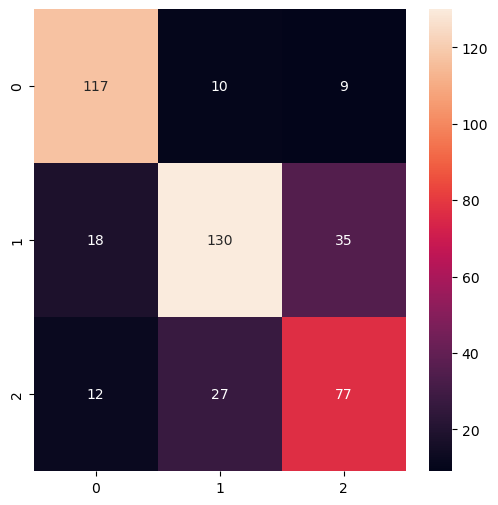

In [224]:
#Confusion Matrix 
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='d')

In [171]:
y_test.shape

(435, 1)

In [226]:
#Son olarak bulduğum en iyi modele, daha iyi öğrenmesi için elimdeki tüm veriyi verdim.
X=pd.concat([X_train_umap,X_test_umap],axis=0)
y=pd.concat([y_train,y_test],axis=0)
best_model.fit(X,y.squeeze())

SVC(C=10, degree=2, gamma='auto')

In [264]:
#Modeli kaydettim
from joblib import dump

dump(best_model, 'best_model.joblib')

['best_model.joblib']

In [230]:
#Öğrenilmiş veri üzerindeki accuracy sonucu.
y_pred=best_model.predict(X_test_umap)
score=accuracy_score(y_pred,y_test.squeeze())
score

0.7770114942528735

In [231]:
#Deneyeceğim random hisse senetlerine eğitim veri setime ne uyguladıysam aynı işlemleri uygulayacağım.
ticker_list=['VNO','SPG','CAT','GE','BA','DE','XOM','CVX','KMI','DUK','SPG','CCI','LRCX','ITW','MT','RIO','KEP','CBRE','AMT']
valid_symbols = [symbol for symbol in ticker_list if isinstance(symbol, str)]
test_data= yfinance.download(valid_symbols, start='2021-01-01')

[*********************100%%**********************]  18 of 18 completed


In [232]:
data_close=test_data['Adj Close'].resample('W-MON').last().pct_change()+1
df = get_rolling_ret(data_close,3)

In [233]:
df

Ticker,AMT,BA,CAT,CBRE,CCI,CVX,DE,DUK,GE,ITW,KEP,KMI,LRCX,MT,RIO,SPG,VNO,XOM
Date,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25,1.036020,1.003157,1.033965,1.094454,1.038000,1.073073,1.114183,1.035671,1.049666,0.996012,0.910362,1.125369,1.187733,0.918163,1.047810,1.177152,1.057829,1.130121
2021-02-01,1.096082,0.947048,0.957922,1.023458,1.073239,0.943341,0.990811,1.043342,0.937991,0.936608,0.867227,0.968493,0.970899,0.919690,0.936620,1.117874,1.113884,0.959009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-19,0.939832,0.993664,1.061533,1.059861,0.993300,1.048546,0.906960,0.970270,1.137757,0.961163,1.056225,1.001346,1.094857,0.992394,0.972836,1.058068,0.894990,1.015166
2024-02-26,0.990764,0.970527,1.012383,1.079314,1.003220,1.024981,0.940885,0.962507,1.123883,1.021793,1.225426,1.027594,1.102711,0.966667,0.957778,1.093135,0.989461,1.036129
2024-03-04,1.074986,0.958009,1.052918,1.043951,1.042610,0.989641,0.935874,1.008839,1.148677,1.010335,1.208763,1.047080,1.076564,0.898983,0.953676,1.046054,0.983171,1.020935


In [234]:
df=df.reset_index()
df

Ticker,Date,AMT,BA,CAT,CBRE,CCI,CVX,DE,DUK,GE,ITW,KEP,KMI,LRCX,MT,RIO,SPG,VNO,XOM
0,2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-25,1.036020,1.003157,1.033965,1.094454,1.038000,1.073073,1.114183,1.035671,1.049666,0.996012,0.910362,1.125369,1.187733,0.918163,1.047810,1.177152,1.057829,1.130121
4,2021-02-01,1.096082,0.947048,0.957922,1.023458,1.073239,0.943341,0.990811,1.043342,0.937991,0.936608,0.867227,0.968493,0.970899,0.919690,0.936620,1.117874,1.113884,0.959009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2024-02-19,0.939832,0.993664,1.061533,1.059861,0.993300,1.048546,0.906960,0.970270,1.137757,0.961163,1.056225,1.001346,1.094857,0.992394,0.972836,1.058068,0.894990,1.015166
164,2024-02-26,0.990764,0.970527,1.012383,1.079314,1.003220,1.024981,0.940885,0.962507,1.123883,1.021793,1.225426,1.027594,1.102711,0.966667,0.957778,1.093135,0.989461,1.036129
165,2024-03-04,1.074986,0.958009,1.052918,1.043951,1.042610,0.989641,0.935874,1.008839,1.148677,1.010335,1.208763,1.047080,1.076564,0.898983,0.953676,1.046054,0.983171,1.020935
166,2024-03-11,1.104847,0.944088,1.040570,1.003436,1.037331,0.982992,1.039841,1.043100,1.116653,1.030955,1.171103,1.050263,1.005583,0.954380,0.934155,1.011887,0.985429,1.050998


In [235]:
df = df.melt(id_vars=['Date'], var_name='id', value_name='Adj Close')
df

,Date,id,Adj Close
0,2021-01-04,AMT,NaN
1,2021-01-11,AMT,NaN
2,2021-01-18,AMT,NaN
3,2021-01-25,AMT,1.036020
4,2021-02-01,AMT,1.096082
...,...,...,...
3019,2024-02-19,XOM,1.015166
3020,2024-02-26,XOM,1.036129
3021,2024-03-04,XOM,1.020935
3022,2024-03-11,XOM,1.050998


In [236]:
print(f'Bos değerleri kaldırmadan önce verinin boyutu: {df.shape}')
print(f'Boş değerlerin tüm veriye oranı {df.isnull().sum().sum()/df.size}')
df.dropna(inplace=True)
print(f'Bos değerleri kaldırdıktan sonra verinin boyutu: {df.shape}')

Bos değerleri kaldırmadan önce verinin boyutu: (3024, 3)
Boş değerlerin tüm veriye oranı 0.005952380952380952
Bos değerleri kaldırdıktan sonra verinin boyutu: (2970, 3)


In [237]:
data=tsfresh.extract_features(df, column_id='id', column_sort='Date', 
                                       default_fc_parameters=tsfresh.feature_extraction.EfficientFCParameters())

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 18/18 [00:07<00:00,  2.30it/s]


In [238]:
data

,Adj Close__variance_larger_than_standard_deviation,Adj Close__has_duplicate_max,Adj Close__has_duplicate_min,Adj Close__has_duplicate,Adj Close__sum_values,Adj Close__abs_energy,Adj Close__mean_abs_change,Adj Close__mean_change,Adj Close__mean_second_derivative_central,Adj Close__median,...,Adj Close__fourier_entropy__bins_5,Adj Close__fourier_entropy__bins_10,Adj Close__fourier_entropy__bins_100,Adj Close__permutation_entropy__dimension_3__tau_1,Adj Close__permutation_entropy__dimension_4__tau_1,Adj Close__permutation_entropy__dimension_5__tau_1,Adj Close__permutation_entropy__dimension_6__tau_1,Adj Close__permutation_entropy__dimension_7__tau_1,Adj Close__query_similarity_count__query_None__threshold_0.0,Adj Close__mean_n_absolute_max__number_of_maxima_7
AMT,0.0,0.0,0.0,0.0,165.459926,166.794041,0.046736,0.000046,-0.000372,1.003422,...,0.726376,1.083108,2.680526,1.693594,2.846757,3.822908,4.562229,4.903246,NaN,1.159354
BA,0.0,0.0,0.0,0.0,165.544654,167.588329,0.057116,-0.000649,0.000027,0.992956,...,0.760266,1.187920,2.683955,1.716002,2.878127,3.925481,4.681406,4.972997,NaN,1.218559
CAT,0.0,0.0,0.0,0.0,167.431752,170.832628,0.045771,0.000290,0.000359,1.014433,...,0.396939,0.753033,2.221836,1.742360,2.914325,4.002516,4.712249,4.960987,NaN,1.202116
CBRE,0.0,0.0,0.0,0.0,166.639600,169.110246,0.045022,-0.000366,0.000313,1.011758,...,0.690860,1.176802,2.858922,1.743030,2.964640,4.076069,4.736118,5.042748,NaN,1.161744
CCI,0.0,0.0,0.0,0.0,164.740981,165.273123,0.042704,-0.000236,-0.000225,0.999040,...,0.588148,1.016621,2.691822,1.711331,2.915628,3.996004,4.758841,4.999154,NaN,1.147121
CVX,0.0,0.0,0.0,0.0,167.367264,170.494890,0.038700,-0.000408,0.000469,1.006518,...,0.386540,0.666539,2.220179,1.711331,2.876811,3.882752,4.528830,4.902093,NaN,1.178746
DE,0.0,0.0,0.0,0.0,166.293707,168.341239,0.044126,-0.000325,0.000443,0.999307,...,0.645742,1.020123,2.640665,1.742006,2.980020,4.097039,4.738242,4.972997,NaN,1.151784
DUK,0.0,0.0,0.0,0.0,165.694963,166.721366,0.027312,0.000071,-0.000011,1.008585,...,0.451957,0.777067,2.213220,1.712442,2.892367,3.962021,4.671051,4.981716,NaN,1.081984
GE,0.0,0.0,0.0,0.0,168.177621,172.444825,0.043294,0.000294,0.000285,1.018472,...,0.569039,0.922976,2.380042,1.755561,2.959521,4.032115,4.738242,4.981716,NaN,1.216426
ITW,0.0,0.0,0.0,0.0,166.154678,167.741034,0.034003,0.000144,0.000148,1.005169,...,0.511685,1.049530,2.645341,1.732658,2.918012,3.977294,4.680862,4.981716,NaN,1.130672


In [239]:
nan_columns = data.columns[data.isnull().all()]
print(f'Veri setindeki tümü boş olan columnlar {len(nan_columns)}')
data.drop(list(nan_columns),inplace=True,axis=1)
print(f'Veri setinin son boyutu {data.shape}')

Veri setindeki tümü boş olan columnlar 69
Veri setinin son boyutu (18, 708)


In [240]:
data.isna().sum().sum()/data.size

0.0

In [242]:
#Pipeline oluşturdum. 
from umap import UMAP
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('transformer',PowerTransformer(method='yeo-johnson')),
    ('selector1',VarianceThreshold(threshold=0.0)),
    ('winsorizer', Winsorizer(capping_method='gaussian', tail='both')),
    ('selector2',DropCorrelatedFeatures(method='spearman', threshold=0.90)),
    ('umap', UMAP(random_state=42, n_jobs=1, n_components=10,n_neighbors=15, min_dist=0.1)),
    ])

pipeline.fit(data)
data = pipeline.transform(data)

Pipeline(steps=[('scaler', RobustScaler()), ('transformer', PowerTransformer()),
                ('selector1', VarianceThreshold()),
                ('winsorizer', Winsorizer(tail='both')),
                ('selector2',
                 DropCorrelatedFeatures(method='spearman', threshold=0.9)),
                ('umap',
                 UMAP(n_components=10, n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}))])

In [244]:
data
data=pd.DataFrame(data)
data

array([[10.161106  ,  5.2307396 ,  3.9888399 , -0.7619814 ,  0.41007155,
         6.8317714 ,  9.911798  ,  8.266356  ,  7.951619  ,  8.840366  ],
       [10.109276  ,  4.8745294 ,  4.5638185 , -1.2596418 ,  1.1290721 ,
         6.9278173 , 10.047505  ,  8.09301   ,  8.317797  ,  8.509603  ],
       [ 9.869822  ,  5.352755  ,  4.3543797 , -1.2816828 ,  0.5947489 ,
         6.518569  , 11.1426115 ,  7.962964  ,  7.609872  ,  8.623119  ],
       [10.239255  ,  4.7258234 ,  4.0431767 , -1.1722424 ,  1.1322372 ,
         6.511704  , 10.363573  ,  8.227335  ,  8.384368  ,  8.679331  ],
       [10.294221  ,  5.09006   ,  3.665723  , -1.1531553 ,  0.39626035,
         6.7107563 , 10.03095   ,  8.589877  ,  8.2135    ,  9.050978  ],
       [ 9.537527  ,  5.156792  ,  4.7962756 , -1.2769927 ,  0.4787277 ,
         7.1463637 , 10.719082  ,  7.906811  ,  7.5489273 ,  9.035107  ],
       [ 9.654685  ,  5.045536  ,  4.522769  , -0.9355829 ,  0.9868721 ,
         6.845278  , 11.120043  ,  7.813974  

,0,1,2,3,4,5,6,7,8,9
0,10.161106,5.230740,3.988840,-0.761981,0.410072,6.831771,9.911798,8.266356,7.951619,8.840366
1,10.109276,4.874529,4.563818,-1.259642,1.129072,6.927817,10.047505,8.093010,8.317797,8.509603
2,9.869822,5.352755,4.354380,-1.281683,0.594749,6.518569,11.142612,7.962964,7.609872,8.623119
3,10.239255,4.725823,4.043177,-1.172242,1.132237,6.511704,10.363573,8.227335,8.384368,8.679331
4,10.294221,5.090060,3.665723,-1.153155,0.396260,6.710756,10.030950,8.589877,8.213500,9.050978
5,9.537527,5.156792,4.796276,-1.276993,0.478728,7.146364,10.719082,7.906811,7.548927,9.035107
6,9.654685,5.045536,4.522769,-0.935583,0.986872,6.845278,11.120043,7.813974,8.171784,8.703683
7,9.820168,5.050974,3.840979,-0.875469,0.273412,6.996306,10.429857,8.436214,7.967885,9.474833
8,10.056181,4.972758,4.546474,-1.633582,0.859570,6.625066,10.578220,7.829873,7.394121,8.772717
9,9.855035,4.864867,3.893976,-1.168581,0.482870,6.738246,11.037939,8.259714,7.839384,9.257932


In [245]:
prediction=best_model.predict(data)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [246]:
new_prediction = []

for num in prediction:
    if num == 1:
        new_prediction.append("health")
    elif num == 2:
        new_prediction.append("technology")
    else:
        new_prediction.append("finance")
print(new_prediction)

['health', 'health', 'health', 'health', 'health', 'health', 'health', 'health', 'health', 'health', 'health', 'health', 'health', 'health', 'health', 'health', 'health', 'health']


In [247]:
#Seçtiğim hisselerin tamamı modelime göre health sektörüne benzerlik göstermektedir
from collections import Counter
Counter(new_prediction)

Counter({'health': 18})

In [248]:
#Real-estate verisi için modeli denedim.
real_estate = pd.read_csv('data/real-estate.csv')
real_estate_list=technology['Symbol'].to_list()

In [249]:
valid_symbols = [symbol for symbol in real_estate_list if isinstance(symbol, str)]
data=yfinance.download(valid_symbols, start='2021-01-01') 

[*********************100%%**********************]  785 of 785 completed


In [250]:
data_close=data['Adj Close'].resample('W-MON').last().pct_change()+1
real_estate = get_rolling_ret(data_close,3)
real_estate

Ticker,AAOI,AAPL,ACIW,ACLS,ACMR,ACN,ADBE,ADEA,ADI,ADSK,...,YOU,ZBRA,ZENV,ZEPP,ZETA,ZFOX,ZI,ZM,ZS,ZUO
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-25,1.250000,1.104397,1.043295,1.382168,1.122082,0.986124,0.975481,1.045745,1.052733,0.989220,...,NaN,1.064793,NaN,1.141961,NaN,NaN,1.018868,1.088477,1.059004,1.060517
2021-02-01,1.070039,1.040006,1.025382,1.174846,0.931635,0.954162,0.991059,0.910441,0.959444,0.900916,...,NaN,0.960221,NaN,1.016212,NaN,0.997059,1.141104,1.130941,1.029039,1.000703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-19,1.336674,0.952082,0.983408,0.868770,1.042044,0.989634,0.867398,0.984565,0.954564,1.004160,...,0.942619,1.076310,1.690265,1.000000,1.034034,1.120000,1.037982,0.901204,1.031422,0.881981
2024-02-26,0.746201,0.966492,1.072614,0.850154,1.363636,1.019280,0.888945,0.900000,0.981564,1.017958,...,0.938968,1.148676,1.591304,1.008475,1.071577,1.224044,1.102081,0.991050,1.041586,0.975610
2024-03-04,0.712042,0.935613,1.027340,0.937950,1.659906,1.044308,0.928249,0.898450,1.007871,0.994886,...,0.954067,1.124325,1.004785,0.855072,1.013766,1.000000,1.038077,1.081110,0.843851,0.949772


In [251]:
df_re=real_estate.reset_index()
df_re = df_re.melt(id_vars=['Date'], var_name='id', value_name='Adj Close')
df_re

,Date,id,Adj Close
0,2021-01-04,AAOI,NaN
1,2021-01-11,AAOI,NaN
2,2021-01-18,AAOI,NaN
3,2021-01-25,AAOI,1.250000
4,2021-02-01,AAOI,1.070039
...,...,...,...
131875,2024-02-19,ZUO,0.881981
131876,2024-02-26,ZUO,0.975610
131877,2024-03-04,ZUO,0.949772
131878,2024-03-11,ZUO,1.112306


In [252]:
print(f'Bos değerleri kaldırmadan önce verinin boyutu: {df_re.shape}')
print(f'Boş değerlerin tüm veriye oranı {df_re.isnull().sum().sum()/df_re.size}')
df_re.dropna(inplace=True)
print(f'Bos değerleri kaldırdıktan sonra verinin boyutu: {df_re.shape}')

Bos değerleri kaldırmadan önce verinin boyutu: (131880, 3)
Boş değerlerin tüm veriye oranı 0.03199878677585684
Bos değerleri kaldırdıktan sonra verinin boyutu: (119220, 3)


In [253]:
data_re=tsfresh.extract_features(df_re, column_id='id', column_sort='Date', 
                                       default_fc_parameters=tsfresh.feature_extraction.EfficientFCParameters())

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 29/29 [00:49<00:00,  1.70s/it]


In [254]:
data_re

,Adj Close__variance_larger_than_standard_deviation,Adj Close__has_duplicate_max,Adj Close__has_duplicate_min,Adj Close__has_duplicate,Adj Close__sum_values,Adj Close__abs_energy,Adj Close__mean_abs_change,Adj Close__mean_change,Adj Close__mean_second_derivative_central,Adj Close__median,...,Adj Close__fourier_entropy__bins_5,Adj Close__fourier_entropy__bins_10,Adj Close__fourier_entropy__bins_100,Adj Close__permutation_entropy__dimension_3__tau_1,Adj Close__permutation_entropy__dimension_4__tau_1,Adj Close__permutation_entropy__dimension_5__tau_1,Adj Close__permutation_entropy__dimension_6__tau_1,Adj Close__permutation_entropy__dimension_7__tau_1,Adj Close__query_similarity_count__query_None__threshold_0.0,Adj Close__mean_n_absolute_max__number_of_maxima_7
AAOI,0.0,0.0,0.0,0.0,171.865927,194.511959,0.159805,-0.002249,0.001198,0.961283,...,0.396939,0.769736,2.413720,1.744713,2.968605,4.020404,4.737095,5.007872,NaN,2.072036
AAPL,0.0,0.0,0.0,0.0,166.282183,168.208450,0.041625,-0.000887,0.000232,1.009466,...,0.689180,1.024424,2.659910,1.749991,2.950783,3.997865,4.743203,4.952269,NaN,1.131218
ACIW,0.0,0.0,0.0,0.0,164.943475,165.913048,0.051093,-0.000122,-0.000006,0.989211,...,0.747271,1.191540,2.909623,1.768151,3.040038,4.180173,4.819491,5.007872,NaN,1.238261
ACLS,0.0,0.0,0.0,0.0,170.358878,179.022486,0.090211,-0.002357,0.000736,1.005821,...,1.039527,1.506510,2.981215,1.744351,2.979166,4.008044,4.726307,5.034029,NaN,1.358019
ACMR,0.0,0.0,0.0,0.0,167.947813,177.322968,0.138521,0.001240,0.000210,1.006845,...,0.730219,1.263926,2.879182,1.731396,2.944844,4.004545,4.685823,4.960987,NaN,1.496290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFOX,0.0,0.0,0.0,1.0,160.622165,163.104365,0.095451,-0.000037,0.000067,1.000000,...,0.834511,1.339130,3.108944,1.703297,2.876799,3.951239,4.750582,5.001177,NaN,1.480611
ZI,0.0,0.0,0.0,0.0,163.610141,165.318641,0.097514,-0.000504,-0.000432,0.989168,...,0.650487,1.109993,2.703964,1.731987,2.900346,3.845957,4.503703,4.875936,NaN,1.292482
ZM,0.0,0.0,0.0,0.0,161.059042,159.056678,0.070720,-0.000239,-0.000352,0.971803,...,0.930899,1.491126,3.119751,1.733029,2.967032,3.990393,4.678136,4.960987,NaN,1.197270
ZS,0.0,0.0,0.0,0.0,166.523110,170.992922,0.092722,-0.001514,0.000142,1.015666,...,0.815816,1.373265,3.084595,1.719104,2.944859,4.011243,4.715519,4.969706,NaN,1.274263


In [255]:
nan_columns = data_re.columns[data_re.isnull().all()]
print(f'Veri setindeki tümü boş olan columnlar {len(nan_columns)}')
data_re.drop(list(nan_columns),inplace=True,axis=1)
print(f'Veri setinin son boyutu {data_re.shape}')

Veri setindeki tümü boş olan columnlar 69
Veri setinin son boyutu (783, 708)


In [256]:
data_re.isna().sum().sum()/data_re.size
data_re.dropna(inplace=True)
data_re.isna().sum().sum()/data_re.size

0.03747718105793305

0.0

In [257]:
#Yukarda oluşturduğum pipeline ile transform ettim.
pipeline.fit(data_re)
df_re = pipeline.transform(data_re)

Pipeline(steps=[('scaler', RobustScaler()), ('transformer', PowerTransformer()),
                ('selector1', VarianceThreshold()),
                ('winsorizer', Winsorizer(tail='both')),
                ('selector2',
                 DropCorrelatedFeatures(method='spearman', threshold=0.9)),
                ('umap',
                 UMAP(n_components=10, n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}))])

In [259]:
df_re=pd.DataFrame(df_re)
df_re

,0,1,2,3,4,5,6,7,8,9
0,9.041026,9.214182,5.542740,3.614551,6.311201,3.048914,4.726544,3.005165,-3.490080,1.826036
1,10.472067,9.949534,4.972690,2.633334,7.111765,3.289267,5.581042,3.815579,-4.453114,0.457968
2,9.941483,9.744182,5.242709,3.525183,6.930384,2.875508,4.879446,3.194762,-4.229325,1.228211
3,9.861031,9.878952,5.129195,3.032802,6.262402,4.243625,4.744629,3.294622,-3.448481,1.912627
4,8.484014,8.945696,5.293121,3.721100,5.556598,2.731379,5.072594,3.371524,-2.717491,1.851253
...,...,...,...,...,...,...,...,...,...,...
576,9.500370,9.489340,5.658767,3.649621,6.748560,2.961601,4.779731,2.994029,-3.628723,1.540802
577,8.766906,9.379620,5.138813,3.380209,5.665550,2.664217,5.716297,3.880035,-2.597958,1.262159
578,8.834320,8.966393,5.230380,3.362192,5.589984,2.668404,5.062085,3.558445,-2.958633,1.508321
579,8.594508,9.132993,5.235148,3.363490,5.473775,2.650622,5.652977,3.810191,-2.512968,1.377594


In [261]:
prediction=best_model.predict(df_re)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [262]:
Counter(prediction)

Counter({1: 581})

In [263]:
print(f"Real estate sembolleri %{(Counter(prediction)[1]/len(prediction))*100} değerinde health sektörüne benzemektedir")

Real estate sembolleri %100.0 değerinde health sektörüne benzemektedir
